In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import re
import ast
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import matplotlib.pyplot as plt

C:\Users\Becky\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('esg_report_2018_19_21_cleansing.csv')
df['noun']  = df['noun'].map(lambda x : ast.literal_eval(x))
df.head(5)

,filename,content,noun
0,report_2018,2018 SUSTINVEST,[SUSTINVEST]
1,report_2018,상장기업 ESG 분석 보고서,"[상장, 기업, ESG, 분석, 보고서]"
2,report_2018,1 글로벌 책임투자 현황,"[글로벌, 책임, 투자, 현황]"
3,report_2018,2 국내 책임투자 현황,"[국내, 책임, 투자, 현황]"
4,report_2018,1 평가대상기업 및 기본정보,"[평가, 대상, 기업, 기본, 정보]"


In [3]:
tokenized_data = []
for noun_list in df['noun']:
    tokenized_data.append(noun_list)
tokenized_data[:3]

[['SUSTINVEST'], ['상장', '기업', 'ESG', '분석', '보고서'], ['글로벌', '책임', '투자', '현황']]

# Word2Vec으로 임베딩

In [4]:
model = Word2Vec(sentences = tokenized_data, vector_size = 200, window = 5, min_count = 5, workers = 4, sg = 0)

In [5]:
model.wv.vectors.shape

(1655, 200)

In [6]:
word_vectors = model.wv
vocabs = word_vectors.key_to_index 
word_vectors_list = [word_vectors[v] for v in vocabs]

In [7]:
# PCA 차원축소
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

In [8]:
vocabs

{'기업': 0,
 '평가': 1,
 '발생': 2,
 'ESG': 3,
 '관리': 4,
 '환경': 5,
 '사회': 6,
 '사고': 7,
 '근로자': 8,
 '안전': 9,
 '업체': 10,
 '성과': 11,
 '영역': 12,
 '관련': 13,
 '기준': 14,
 '트': 15,
 '규모': 16,
 '컨': 17,
 '점수': 18,
 '투자': 19,
 '주주': 20,
 '버시': 21,
 '구조': 22,
 '가능': 23,
 '지속': 24,
 '섹터': 25,
 '사망': 26,
 '이슈': 27,
 '경영': 28,
 '경우': 29,
 '등급': 30,
 '산업': 31,
 '대상': 32,
 '지배': 33,
 '작업': 34,
 '수준': 35,
 '정보': 36,
 '한국': 37,
 '법': 38,
 '책임': 39,
 '배출': 40,
 '리스크': 41,
 '당사': 42,
 '협력': 43,
 '해당': 44,
 '사업': 45,
 '공시': 46,
 '결과': 47,
 '공정': 48,
 '사건': 49,
 '개선': 50,
 '행위': 51,
 '고용': 52,
 '위반': 53,
 '문제': 54,
 '이상': 55,
 '이사': 56,
 '현대': 57,
 '중공업': 58,
 '회사': 59,
 '활동': 60,
 '평균': 61,
 '물질': 62,
 '시장': 63,
 '삼성': 64,
 '시스템': 65,
 '감사': 66,
 '국내': 67,
 '보고서': 68,
 '서비스': 69,
 '삼성전자': 70,
 '내부': 71,
 'Controversy': 72,
 '자산': 73,
 '담합': 74,
 '거래': 75,
 '표': 76,
 '제도': 77,
 '부문': 78,
 '가치': 79,
 '집단': 80,
 '건설': 81,
 '하청': 82,
 '증가': 83,
 '대비': 84,
 '간': 85,
 '조사': 86,
 '인': 87,
 '이후': 88,
 '포함': 89,
 'Level'

In [9]:
len(word_vectors_list)

1655

In [10]:
xs.shape

(1655,)

In [11]:
pca_table = pd.DataFrame.from_dict([vocabs]).transpose().reset_index()
pca_table.columns = ['word', 'num']
pca_table['pca_x'] = xs
pca_table['pca_y'] = ys

In [16]:
pca_100 = pca_table.head(100)

In [17]:
word_vectors_list[0].shape

(200,)

C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


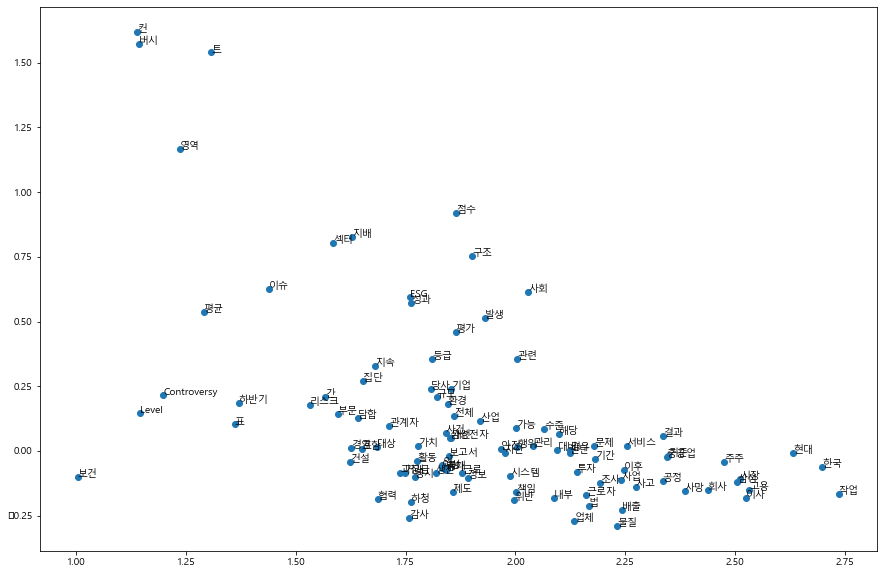

In [18]:
def plot_2d_graph(table):
    plt.figure(figsize=(15,10))
    plt.scatter(table['pca_x'],table['pca_y'],marker='o')
    for i in tqdm(range(len(table))):
        plt.annotate(table.loc[i,'word'],xy=(table.loc[i,'pca_x'], table.loc[i,'pca_y']))
        
plot_2d_graph(pca_100)

C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


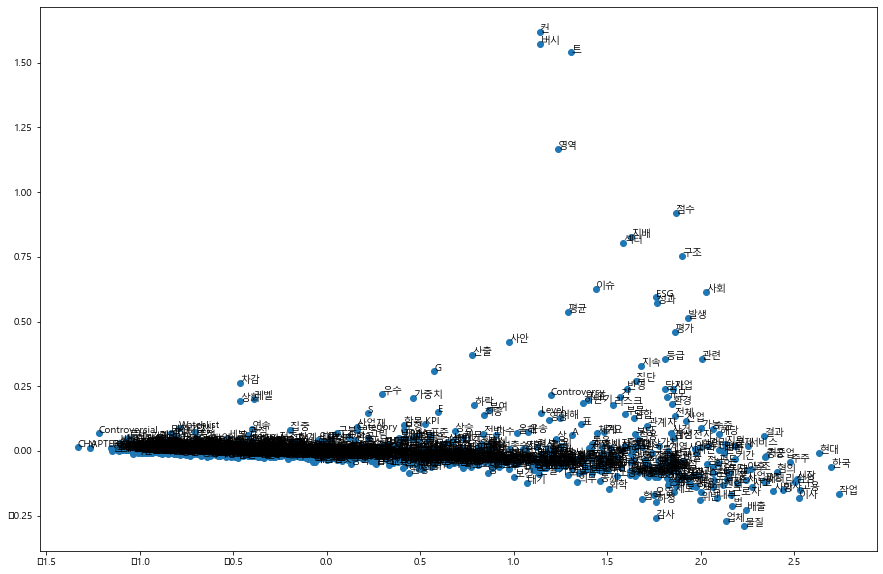

In [15]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(15,10))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))
        
plot_2d_graph(vocabs, xs,ys)

In [39]:
print('ESG :', model.wv.most_similar("ESG", topn=20), '\n')
print('환경 :', model.wv.most_similar("환경", topn=20), '\n')
print('지배 :', model.wv.most_similar("지배", topn=20), '\n')
print('사회 :', model.wv.most_similar("사회", topn=20), '\n')

ESG : [('CDR', 0.5673311352729797), ('반영', 0.5629334449768066), ('전반', 0.5626614689826965), ('자리', 0.5565698146820068), ('대내외', 0.5483478307723999), ('EGS', 0.5330808162689209), ('국내외', 0.5329896211624146), ('개념', 0.5273719429969788), ('내재', 0.5272206664085388), ('모범', 0.5233761668205261), ('불가결', 0.5228233337402344), ('준비', 0.5216736793518066), ('설명', 0.5164370536804199), ('차원', 0.5131252408027649), ('최근', 0.5127871632575989), ('세부', 0.5121675729751587), ('대외', 0.5104105472564697), ('행보', 0.5085665583610535), ('재무', 0.5080469250679016), ('거버넌스', 0.506513237953186)] 

환경 : [('Governance', 0.5603059530258179), ('전반', 0.5424186587333679), ('친환경', 0.5384735465049744), ('Social', 0.5273428559303284), ('건전', 0.5105456113815308), ('인권', 0.5052124857902527), ('화두', 0.500080943107605), ('G', 0.49767231941223145), ('가속', 0.48203885555267334), ('윤리', 0.4746975600719452), ('반', 0.4714745879173279), ('확립', 0.46765950322151184), ('Society', 0.4643760025501251), ('CSR', 0.4594806730747223), ('실천', 0

In [43]:
model.wv.similarity(w1 = '자리', w2 = 'ESG')

0.5565698

In [17]:
word_vectors_list[0]

array([-0.21358128,  0.573906  ,  0.45120597,  1.095755  , -0.01776871,
       -0.30648693,  0.94023544,  0.22213256, -1.2155229 , -0.81915647,
       -0.2757164 ,  0.732277  ,  0.47805604,  0.86807793, -0.8367596 ,
        0.39091954,  1.0938808 ,  0.39373162, -1.2307372 , -1.3303802 ,
       -0.6608496 , -0.56995   ,  1.673834  , -0.222074  , -1.0683062 ,
       -0.41229582,  0.10144454, -1.1887721 , -0.63319194, -0.03452012,
       -0.68346125,  0.3244425 ,  0.61608183, -0.71524125, -0.42529508,
        0.24946722,  0.57390046, -1.1859729 ,  0.04804997, -1.2365146 ,
       -1.3474705 ,  0.11995353, -0.62387514, -0.02560182, -0.28570896,
        0.7647427 ,  0.19401182, -0.6592149 ,  0.4450102 ,  0.4283203 ,
        0.17481868,  1.2506112 ,  0.08860414,  0.27030185,  0.52192813,
       -0.93434334, -0.20699185, -0.1150556 , -0.34844035, -0.00915829,
        0.62540585, -0.61006343,  0.5896135 , -1.2956699 , -1.7672582 ,
        0.5362819 , -1.2170948 , -0.12471496, -1.1068774 ,  0.77

In [4]:
tokenized_data_list = []

for i in tqdm(range(len(tokenized_data))):
    tokenized_data_list += tokenized_data[i] 

In [5]:
import collections

counts = collections.Counter(tokenized_data_list)
word_count = pd.DataFrame.from_dict(counts, orient='index').reset_index()
word_count.columns = ['word','count']
word_count = word_count.sort_values('count',ascending = False).reset_index(drop=True)

In [6]:
word_count

,word,count
0,기업,921
1,평가,710
2,발생,485
3,ESG,462
4,관리,408
...,...,...
5037,민원,1
5038,공임,1
5039,료,1
5040,NHTS,1


In [9]:
word_count.sum()

word     기업평가발생ESG관리환경사회사고근로자안전업체성과영역관련기준트규모컨점수투자주주버시구조...
count                                                56109
dtype: object

In [18]:
56109*0.8

44887.200000000004

In [26]:
a = word_count.loc[:900,'count']
a.sum()

44825

In [28]:
word_count.loc[900,:]

word      칼
count    11
Name: 900, dtype: object

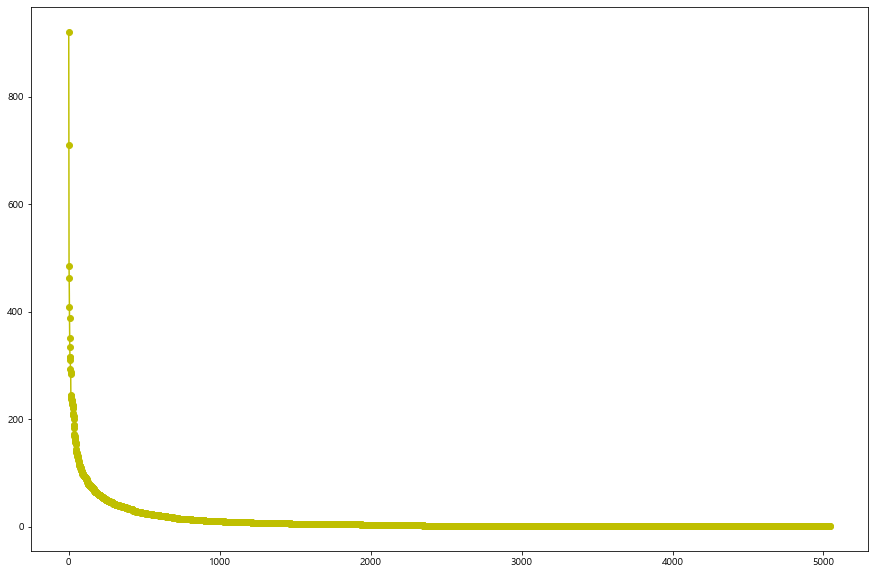

In [8]:
plt.figure(figsize=(15,10))
plt.plot(word_count['count'], marker='o', color='y')